# **Final Project Surface Hydrology**

## ***Mount St. Helens***

In [4]:
# Install necessary packages
# Install the pyet package for calculating potential evapotranspiration
!pip install pyet

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import altair as alt
from scipy.stats import genextreme
import pyet

# NOAA Data Download Helper
from noaa_ftp import NOAA

In [6]:
# Set up visualization aesthetics
sns.set_theme(style="ticks", font_scale=1.5)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [7]:
# Function to download data from NOAA
def download_data(station_name, station_code):
    # URLs for downloading daily and monthly data from NOAA
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    
    # Download daily data
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                               station_name + '_daily.csv')
    
    # Download monthly data
    urllib.request.urlretrieve(url_monthly + station_code + '.csv',
                               station_name + '_monthly.csv')

# Uncomment the next line to download data
download_data('PARADISE', 'USC00456898')

In [8]:
# Load and preprocess data
df_PARADISE = pd.read_csv('PARADISE_daily.csv', sep=",", parse_dates=['DATE'], index_col='DATE')

# Filter data from 1920 onward
df_PARADISE = df_PARADISE[df_PARADISE.index >= '1920-01-01']

# Convert precipitation and temperature units
df_PARADISE['PRCP'] = df_PARADISE['PRCP'] / 10  # Convert precipitation from tenths of mm to mm
df_PARADISE['TMIN'] = df_PARADISE['TMIN'] / 10  # Convert temperature from tenths of °C to °C
df_PARADISE['TMAX'] = df_PARADISE['TMAX'] / 10  # Convert temperature from tenths of °C to °C

# Resample data to monthly and yearly frequencies
monthly_PARADISE = df_PARADISE.resample('M').sum()
yearly_PARADISE = df_PARADISE.resample('Y').sum()

# Calculate annual averages
annual_data_PARADISE = df_PARADISE.resample('A').agg({
    'PRCP': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean'
}).reset_index()

C:\Users\matar\AppData\Local\Temp\ipykernel_25604\4157359036.py:2: DtypeWarning: Columns (19,23,27,29,31,33,35,37,39,41,43,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_PARADISE = pd.read_csv('PARADISE_daily.csv', sep=",", parse_dates=['DATE'], index_col='DATE')


In [9]:
# Calculate monthly and yearly averages for different periods
df_month_PARADISE = df_PARADISE['PRCP'].resample('M').sum().to_frame()
df_month_avg_PARADISE = df_month_PARADISE.groupby(df_month_PARADISE.index.month).mean()

# Filter data for specific periods
df_1920_2023 = df_month_PARADISE.loc['1920-01-01':'2023-12-31']
df_1920_1980 = df_month_PARADISE.loc['1920-01-01':'1980-12-31']
df_1980_2023 = df_month_PARADISE.loc['1980-01-01':'2023-12-31']

# Calculate monthly averages for each period
df_1920_2023_avg = df_1920_2023.groupby(df_1920_2023.index.month).mean()
df_1920_1980_avg = df_1920_1980.groupby(df_1920_1980.index.month).mean()
df_1980_2023_avg = df_1980_2023.groupby(df_1980_2023.index.month).mean()

# **1. Long-Term Impacts**

## **1.1 Precipitation**

### **1.1.1 Seasonal Changes**

### *Figure 3: Monthly Average Precipitation, Paradise (Mount St. Helens)*

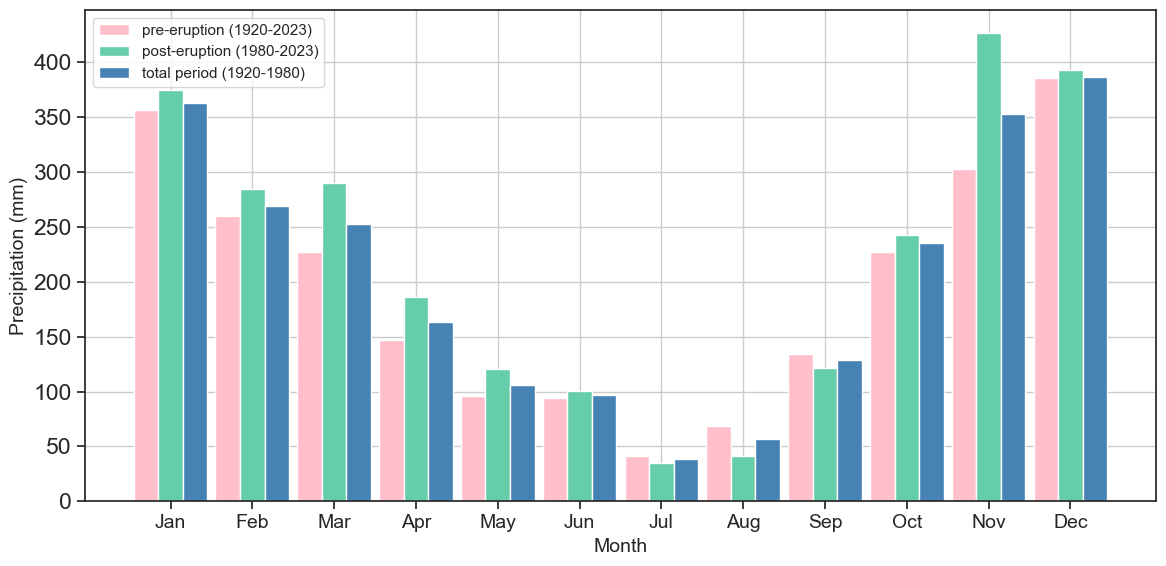

In [10]:
# Plot Monthly Average Precipitation for Different Periods
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.3
months = np.arange(1, 13)

# Plot bars for each period
ax.bar(months - bar_width, df_1920_1980_avg['PRCP'], width=bar_width, color='pink', label='pre-eruption (1920-2023)')
ax.bar(months, df_1980_2023_avg['PRCP'], width=bar_width, color='mediumaquamarine', label='post-eruption (1980-2023)')
ax.bar(months + bar_width, df_1920_2023_avg['PRCP'], width=bar_width, color='steelblue', label='total period (1920-1980)')


# Set labels, ticks, and legend
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Precipitation (mm)", fontsize=14)
ax.set_xticks(months)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True)

# Save and display the plot
plt.tight_layout()
plt.savefig("Monthly_avg_PA_combined.png")
plt.show()

In [11]:
# Create a DataFrame for monthly averages
monthly_avg_df = pd.DataFrame({
    'Before 1980': df_1920_1980_avg['PRCP'].round(2),
    'After 1980': df_1980_2023_avg['PRCP'].round(2),
    'Combined': df_1920_2023_avg['PRCP'].round(2)
})

# Calculate total yearly averages and delta
yearly_avg_before = df_1920_1980['PRCP'].mean().round(2)
yearly_avg_after = df_1980_2023['PRCP'].mean().round(2)
yearly_avg_combined = df_1920_2023['PRCP'].mean().round(2)
monthly_avg_df.loc['Yearly Average'] = [yearly_avg_before, yearly_avg_after, yearly_avg_combined]
monthly_avg_df['Delta'] = abs(monthly_avg_df['After 1980'] - monthly_avg_df['Before 1980']).round(2)

# Display the DataFrame
monthly_avg_df

,Before 1980,After 1980,Combined,Delta
DATE,,,,
1,356.15,375.06,363.21,18.91
2,260.09,284.84,268.90,24.75
3,227.16,290.09,252.59,62.93
4,147.25,186.19,163.23,38.94
5,96.15,120.43,106.29,24.28
6,94.01,100.47,96.62,6.46
7,41.21,34.85,38.48,6.36
8,68.13,41.53,56.62,26.60
9,134.41,121.41,128.80,13.00


### **1.1.2.	Inter-Annual Variability**

### *Figure 4: Daily Precipitation Along 1920-2023, Paradise (Mount St. Helens)*

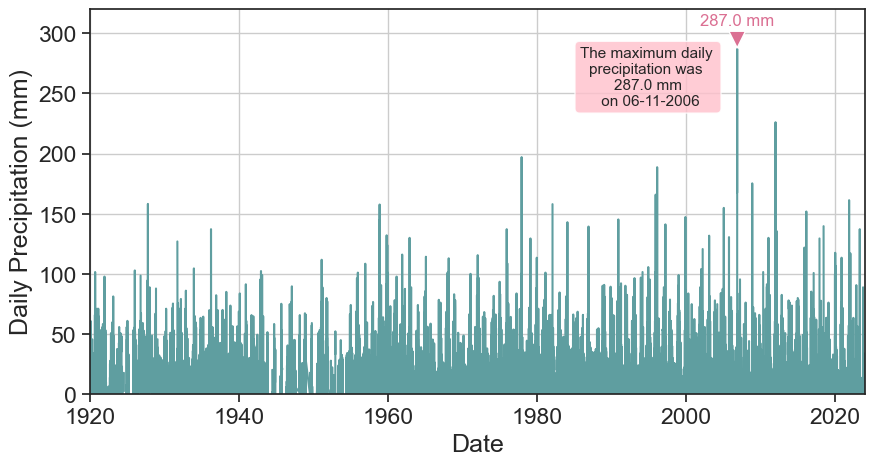

In [12]:
# Plot Daily Precipitation and Highlight Maximum Value
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_PARADISE['PRCP'], 'cadetblue')
ax.set(xlabel="Date", ylabel="Daily Precipitation (mm)")
ax.set_ylim(0, 320)
ax.set_xlim(pd.Timestamp('1920-01-01'), pd.Timestamp('2023-12-31'))
ax.grid()

# Annotate maximum value
max_value = df_PARADISE['PRCP'].max()
max_date = df_PARADISE['PRCP'].idxmax()
formatted_max_date = max_date.strftime('%d-%m-%Y')

ax.text(0.72, 0.75, f"The maximum daily \nprecipitation was \n{max_value} mm\n on {formatted_max_date}",
        transform=ax.transAxes, fontsize=11, bbox=dict(boxstyle='round', facecolor='pink', alpha=0.8), ha='center')
ax.annotate(f'{max_value} mm', xy=(max_date, max_value), xytext=(max_date, max_value + 20),
            arrowprops=dict(facecolor='palevioletred', shrink=0.05), fontsize=12, color='palevioletred', ha='center')

# Save and display the plot
plt.savefig("Daily_Precipitation_Mount_St_Helens_PA.png")
plt.show()

### **1.1.3. Extreme Precipitation Events**

### *Figure 5: Probability and Cumulative Density Function of Annual Daily Maximum Precipitation, Paradise (Mount St. Helens)*

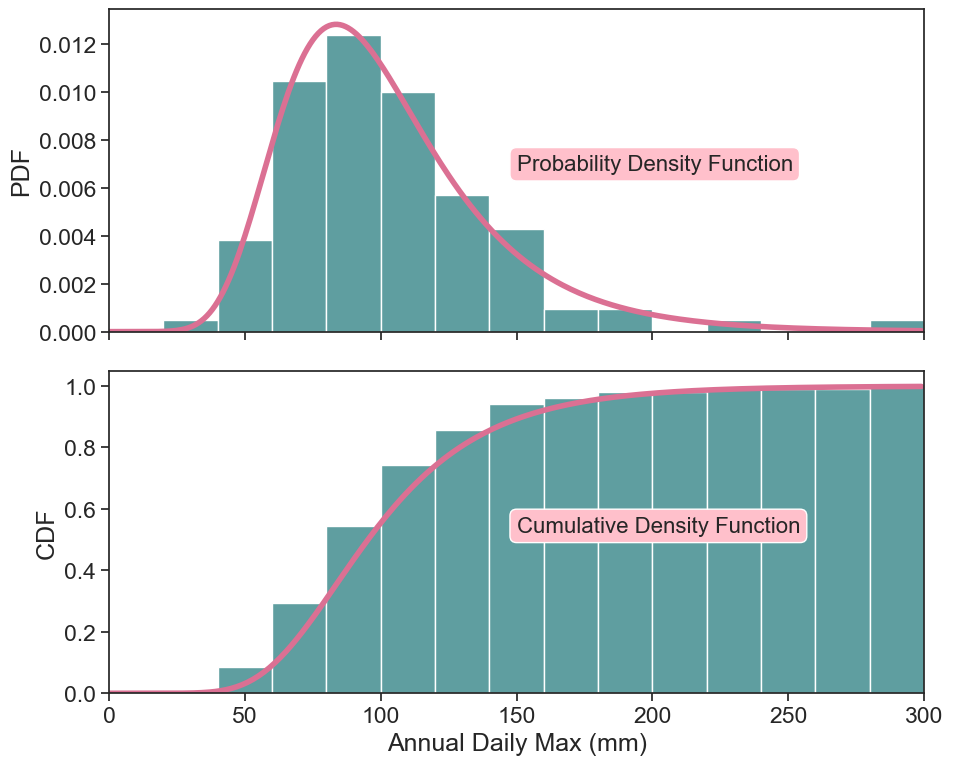

In [13]:
# Plot Maximum Annual Precipitation with PDF and CDF
def plot_max_annual_precipitation(df_PARADISE):
    max_annual = df_PARADISE['PRCP'].resample('AS-OCT').max().to_frame()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)
    h = max_annual['PRCP'].values
    bins = np.arange(0, 310, 20)

    # Plot PDF and CDF histograms
    ax1.hist(h, bins=bins, density=True, color='cadetblue')
    ax1.set(ylabel="PDF")
    ax2.hist(h, bins=bins, cumulative=1, density=True, color='cadetblue')
    ax2.set(xlabel="Annual Daily Max (mm)", ylabel="CDF", xlim=[0, 300])

    # Fit and plot GEV distribution
    params = genextreme.fit(h)
    rain = np.arange(0, 300)
    pdf = genextreme(c=params[0], loc=params[1], scale=params[2]).pdf
    cdf = genextreme(c=params[0], loc=params[1], scale=params[2]).cdf
    ax1.plot(rain, pdf(rain), color='palevioletred', lw=4)
    ax2.plot(rain, cdf(rain), color='palevioletred', lw=4)

    # Add annotations
    ax1.text(0.5, 0.5, "Probability Density Function", transform=ax1.transAxes, fontsize=16, bbox=dict(boxstyle='round', facecolor='pink', alpha=1))
    ax2.text(0.5, 0.5, "Cumulative Density Function", transform=ax2.transAxes, fontsize=16, bbox=dict(boxstyle='round', facecolor='pink', alpha=1))

    plt.tight_layout()
    plt.savefig("PDF_CDF_St_Helens_PA.png")
    plt.show()

# Call the function to plot max annual precipitation
plot_max_annual_precipitation(df_PARADISE)

### **1.1.4. Return period**

### *Figure 6: Annual Maximum Precipitation and Return Period: Observed Data and GEV Model, Paradise (Mount St. Helens)*

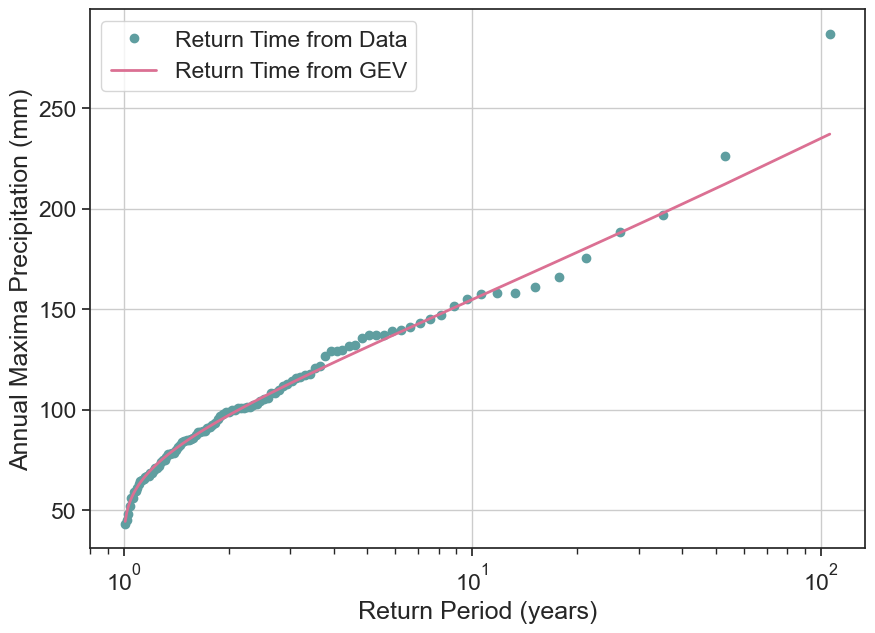

In [14]:
# Extract the maximum daily precipitation for each year
annual_maxima = df_PARADISE['PRCP'].resample('Y').max()

# Fit the GEV distribution to the annual maxima data
gev_params = genextreme.fit(annual_maxima)

# Calculate empirical return periods
rank = np.arange(1, len(annual_maxima) + 1)
empirical_return_periods = (len(annual_maxima) + 1) / rank

# Calculate return levels from the GEV distribution
gev_return_levels = genextreme.isf(1/empirical_return_periods, *gev_params)

# Plot the return period vs annual maxima
plt.figure(figsize=(10, 7))
plt.plot(empirical_return_periods, np.sort(annual_maxima)[::-1], color='cadetblue', marker='o', linestyle='none', label='Return Time from Data')
plt.plot(empirical_return_periods, gev_return_levels, color='palevioletred', lw=2, label='Return Time from GEV')
plt.xscale('log')
plt.xlabel('Return Period (years)')
plt.ylabel('Annual Maxima Precipitation (mm)')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Annual_Daily_Precipitation_Maxima_PA.png")
plt.show()


### *Table 1: Precipitation Return Levels*

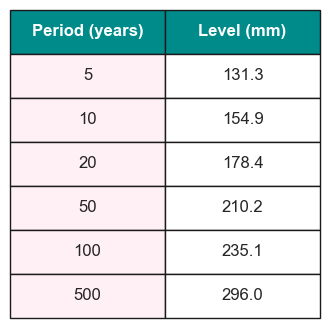

In [15]:
# Resample the 'PRCP' column to get the maximum annual precipitation (already done previously)
max_annual = annual_maxima.to_frame()  # No need to resample again; reuse the data

# Add ranks to the data for further use or analysis
max_annual['rank'] = max_annual['PRCP'].rank()

# Compute return levels for specific return periods using the previously fitted GEV distribution
return_periods = np.array([5, 10, 20, 50, 100, 500])
return_levels = genextreme.isf(1/return_periods, *gev_params)

# Create a DataFrame for the return periods and levels
return_period_df = pd.DataFrame({
    'Period (years)': return_periods,
    'Level (mm)': [f'{x:.1f}' for x in return_levels]
})

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis('off')

# Create the table
table = plt.table(cellText=return_period_df.values,
                  colLabels=return_period_df.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Set background colors for headers and cells
for (i, j), cell in table._cells.items():
    if i == 0:  # Header row
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('darkcyan')
    else:  # Data cells
        if j % 2 == 0:
            cell.set_facecolor('lavenderblush')
        else:
            cell.set_facecolor('white')

# Save the figure
plt.savefig('return_levels_table_PA.png', bbox_inches='tight', dpi=300)
plt.show()

## **1.2.	Temperature**

### **1.2.1. Seasonal changes**

In [16]:
# Define periods and filter data
df_1979 = df_month_PARADISE.loc['1979-01-01':'1979-12-31']
df_1980 = df_month_PARADISE.loc['1980-01-01':'1980-12-31']
df_1981 = df_month_PARADISE.loc['1981-01-01':'1981-12-31']

# Filter daily data for May in each year
df_1979_may = df_PARADISE.loc['1979-05-01':'1979-05-31']
df_1980_may = df_PARADISE.loc['1980-05-01':'1980-05-31']
df_1981_may = df_PARADISE.loc['1981-05-01':'1981-05-31']
df_tot_may = df_PARADISE.loc['1920-05-01':'2023-05-31']

### *Figure 7: Monthly Averaged Minimum and Maximum Temperatures, Paradise (Mount St. Helens)*

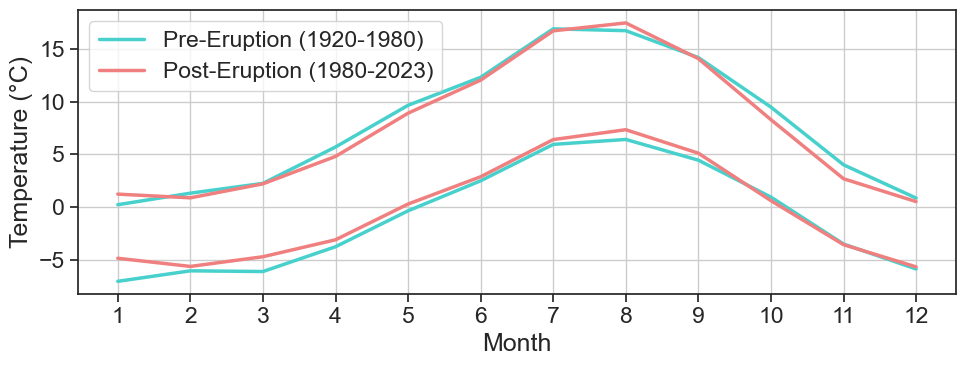

In [17]:
df_month_temp = df_PARADISE[['TMIN', 'TMAX']].resample('M').mean()

# Filter the data for different periods
df_1920_1980_temp = df_month_temp.loc['1920-01-01':'1980-12-31']
df_1980_2023_temp = df_month_temp.loc['1980-01-01':'2023-12-31']

# Group the data by month and calculate monthly averages
df_1920_1980_avg_temp = df_1920_1980_temp.groupby(df_1920_1980_temp.index.month).mean()
df_1980_2023_avg_temp = df_1980_2023_temp.groupby(df_1980_2023_temp.index.month).mean()

# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(10, 4))

# Plot TMIN and TMAX for the pre-eruption period (1920-1980)
ax.plot(df_1920_1980_avg_temp.index, 
        df_1920_1980_avg_temp['TMIN'], 
        color='mediumturquoise', linewidth=2.5)
ax.plot(df_1920_1980_avg_temp.index, 
        df_1920_1980_avg_temp['TMAX'], 
        color='mediumturquoise', linewidth=2.5, label='Pre-Eruption (1920-1980)')

# Plot TMIN and TMAX for the post-eruption period (1980-2023)
ax.plot(df_1980_2023_avg_temp.index, 
        df_1980_2023_avg_temp['TMIN'], 
        color='lightcoral', linewidth=2.5)
ax.plot(df_1980_2023_avg_temp.index, 
        df_1980_2023_avg_temp['TMAX'], 
        color='lightcoral', linewidth=2.5, label='Post-Eruption (1980-2023)')

# Set labels, title, and grid
ax.set(ylabel="Temperature (°C)", 
       xlabel="Month", 
#        title="Monthly Average TMIN and TMAX Before and After the Eruption")
)
ax.set_xticks(np.arange(1, 13))
ax.grid(True)

# Add legend with only two entries
ax.legend(loc='upper left')

# Adjust layout to fit everything, especially the legend
plt.tight_layout()
plt.savefig("Monthly_AVG_TMIN_TMAX.png")
plt.show()

### **1.2.1.	Annual Trends**

### *Figure 8: Annual Average Maximum and Minimum Temperatures (1920-2023), with 10-year Rolling Averages, Paradise (Mount St. Helens)*

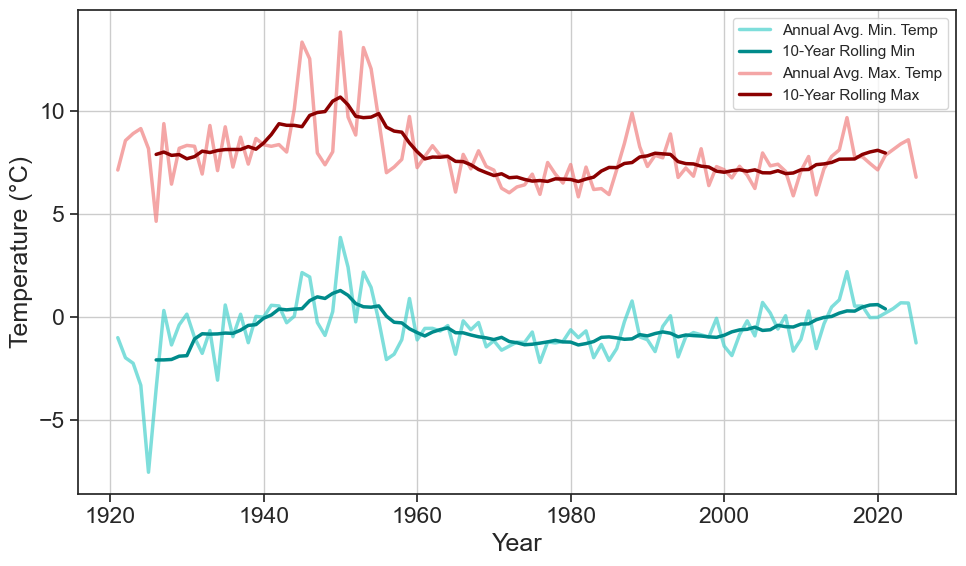

In [18]:
# Calculate and plot annual average temperatures with rolling averages
df_annual_avg = df_PARADISE[['TMIN', 'TMAX']].resample('Y').mean()
rolling_window = 10  # Defined rolling window
df_rolling_avg = df_annual_avg.rolling(window=rolling_window, center=True).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_annual_avg.index, df_annual_avg['TMIN'], label='Annual Avg. Min. Temp', color='mediumturquoise', linewidth=2.5, alpha=0.7)
plt.plot(df_rolling_avg.index, df_rolling_avg['TMIN'], label=f'{rolling_window}-Year Rolling Min', color='darkcyan', linewidth=2.5)
plt.plot(df_annual_avg.index, df_annual_avg['TMAX'], label='Annual Avg. Max. Temp', color='lightcoral', linewidth=2.5, alpha=0.7)
plt.plot(df_rolling_avg.index, df_rolling_avg['TMAX'], label=f'{rolling_window}-Year Rolling Max', color='darkred', linewidth=2.5)

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(fontsize = 11)
plt.grid(True)
plt.tight_layout()
plt.savefig("Annual_Avg_Temperatures_with_Rolling_Averages_1920_2023.png")
plt.show()

# **2.	Short-Term Impacts**

## **2.1.	Precipitation**

In [19]:
# Define periods and filter data
# df_1978 = df_month_PARADISE.loc['1978-01-01':'1978-12-31']
df_1979 = df_month_PARADISE.loc['1979-01-01':'1979-12-31']
df_1980 = df_month_PARADISE.loc['1980-01-01':'1980-12-31']
df_1981 = df_month_PARADISE.loc['1981-01-01':'1981-12-31']

# Filter daily data for May in each year
df_1979_may = df_PARADISE.loc['1979-05-01':'1979-05-31']
df_1980_may = df_PARADISE.loc['1980-05-01':'1980-05-31']
df_1981_may = df_PARADISE.loc['1981-05-01':'1981-05-31']
df_tot_may = df_PARADISE.loc['1920-05-01':'2023-05-31']

### **2.1.1.	Seasonality, 1980 vs. different time-scales**

### *Figure 9: Monthly Precipitation Comparison Between 1920-2023 Average and 1980, Paradise (Mount St. Helens)*

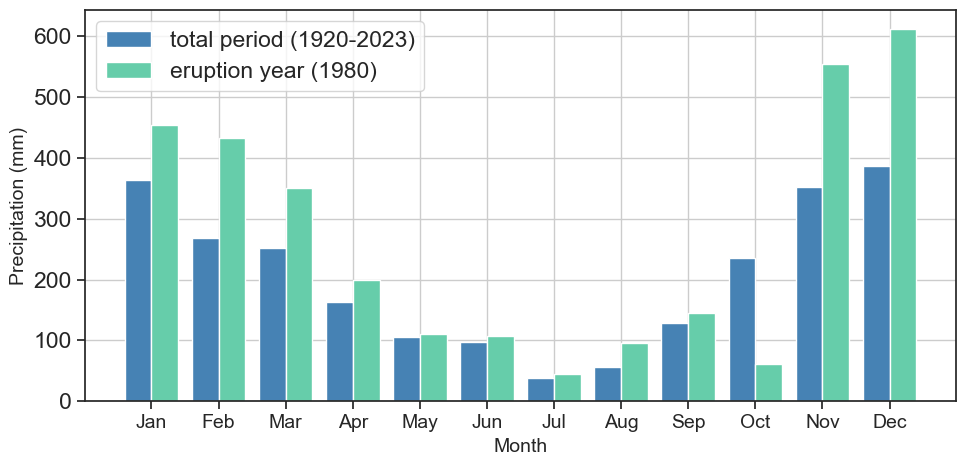

In [20]:
# Define the months for x-axis
months = np.arange(1, 13)

# Define positions for bars
bar_width = 0.4
positions_combined = months - bar_width / 2
positions_1980 = months + bar_width / 2

# Create subplots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
ax.bar(positions_combined, df_1920_2023_avg['PRCP'], width=bar_width, color='steelblue', label='total period (1920-2023)')
ax.bar(positions_1980, df_1980['PRCP'], width=bar_width, color='mediumaquamarine', label='eruption year (1980)')

# Set labels, title, and ticks
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Precipitation (mm)", fontsize=14)
ax.set_xticks(months)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
ax.legend()

# Add grid for better readability
ax.grid(True)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("Monthly_avg_combined_vs_1980.png")
plt.show()

### *Figure 10: Monthly Precipitation Comparison Between 1978-1981 Around the 1980 eruption, Paradise (Mount St. Helens)*

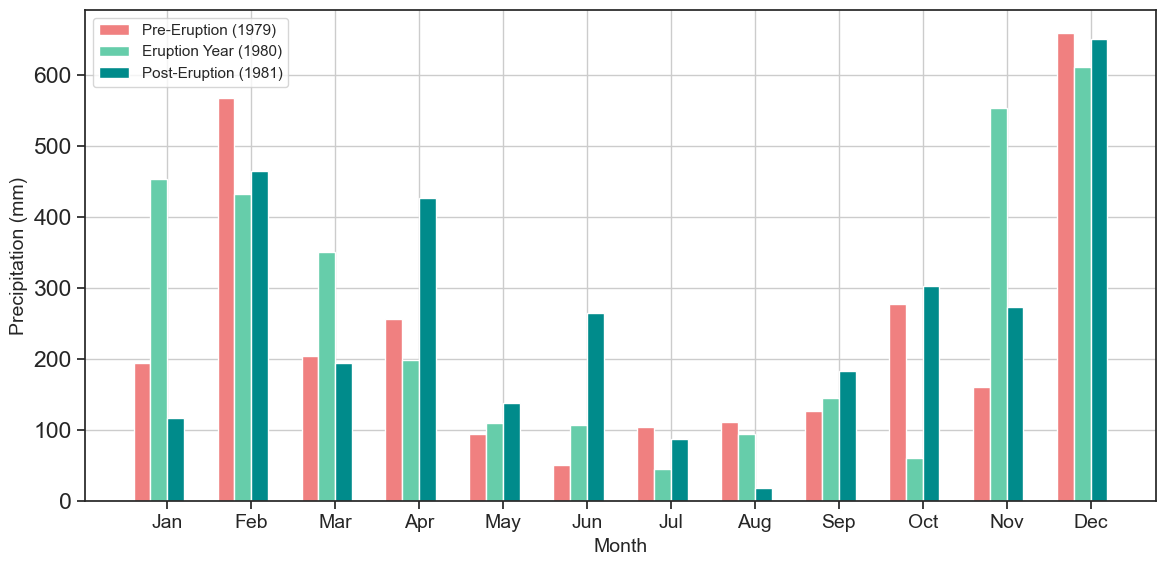

In [21]:
# Set the width for the bars
bar_width = 0.2

# Define the position of bars on the x-axis
months = np.arange(1, 13)  # Months from January to December
positions_1979 = months
positions_1980 = months + bar_width
positions_1981 = months + 2 * bar_width

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each year
ax.bar(positions_1979, df_1979['PRCP'], width=bar_width, color='lightcoral', label='Pre-Eruption (1979)')
ax.bar(positions_1980, df_1980['PRCP'], width=bar_width, color='mediumaquamarine', label='Eruption Year (1980)')
ax.bar(positions_1981, df_1981['PRCP'], width=bar_width, color='darkcyan', label='Post-Eruption (1981)')

# Set labels, title, and ticks
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Precipitation (mm)", fontsize=14)
ax.set_xticks(months + bar_width * 1.5)  # Center ticks between the groups
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
ax.legend(loc='upper left', fontsize=11)

# Add grid for better readability
ax.grid(True)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("Monthly_PRCP_Short.png")
plt.show()


### **2.1.2.	Daily Changes at the Eruption Month**

### *Figure 11: Daily Precipitation in May: 1979–1981 Compared to the Long-Term Average (1920–2023), Paradise (Mount St. Helens)*

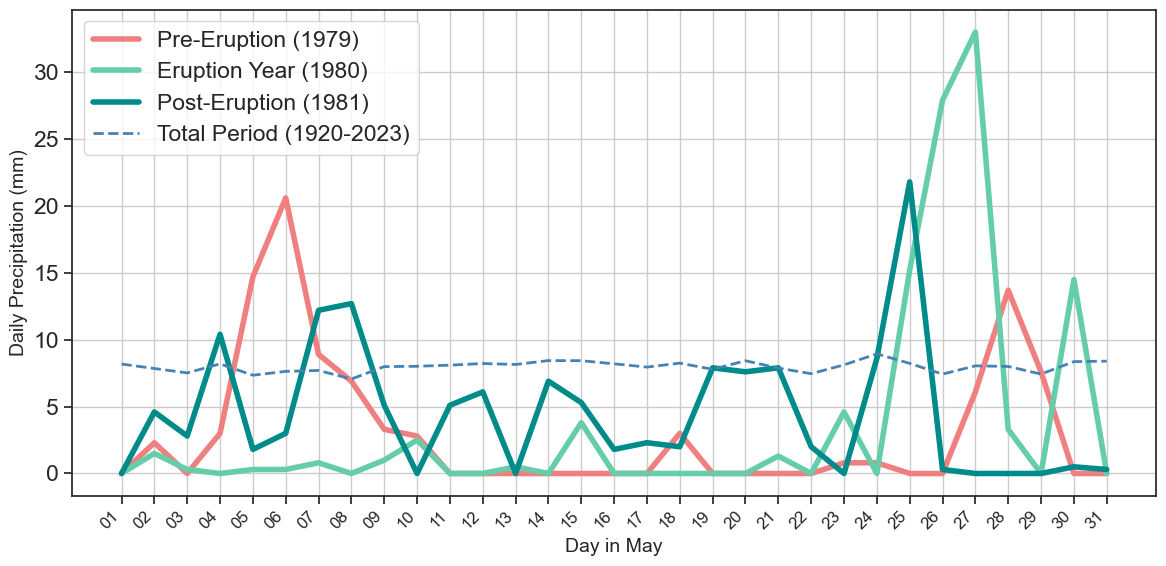

In [22]:
# Create a common x-axis with days from 1 to 31 (for May)
days_in_may = np.arange(1, 32)

# Calculate the average daily precipitation for each day in May across 1920-2023
avg_daily_prcp_tot = df_tot_may['PRCP'].groupby(df_tot_may.index.day).mean()

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each year with a line curve
ax.plot(days_in_may, df_1979_may['PRCP'], color='lightcoral', label='Pre-Eruption (1979)', linewidth=4)
ax.plot(days_in_may, df_1980_may['PRCP'], color='mediumaquamarine', label='Eruption Year (1980)', linewidth=4)
ax.plot(days_in_may, df_1981_may['PRCP'], color='darkcyan', label='Post-Eruption (1981)', linewidth=4)

# Plot the average daily precipitation for all years
ax.plot(days_in_may, avg_daily_prcp_tot, color='steelblue', label='Total Period (1920-2023)', linestyle='--', linewidth=2)

# Set labels and title
ax.set_xlabel("Day in May", fontsize=14)
ax.set_ylabel("Daily Precipitation (mm)", fontsize=14)

# Customize the x-axis
ax.set_xticks(days_in_may)
ax.set_xticklabels([f'{day:02d}' for day in days_in_may], rotation=45, ha='right', fontsize=12)

# Add legend and grid
ax.legend()
ax.grid(True)

# Save and show the figure
plt.savefig("May_PRCP_Comparison.png")
plt.tight_layout()
plt.show()


## **2.2.	 Temperature**

### **2.2.1.	Seasonality, 1980 vs. different time-scales**

### *Figure 12: Monthly Min & Max Temperature Comparison Between Pre- (1978-1980) and Post-Eruption (1980-1982), Paradise (Mount St. Helens)*

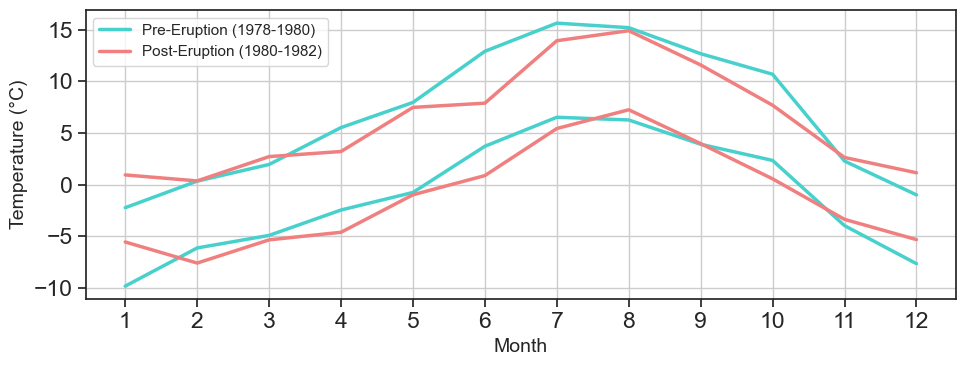

In [23]:
# Filter the data for different periods
df_1978_1980_temp = df_month_temp.loc['1978-05-18':'1980-05-18']
df_1980_1982_temp = df_month_temp.loc['1980-05-18':'1982-05-18']

# Group the data by month and calculate monthly averages
df_1978_1980_avg_temp = df_1978_1980_temp.groupby(df_1978_1980_temp.index.month).mean()
df_1980_1982_avg_temp = df_1980_1982_temp.groupby(df_1980_1982_temp.index.month).mean()

# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(10, 4))

# Plot TMIN and TMAX for the pre-eruption period (1978-1980)
ax.plot(df_1978_1980_avg_temp.index, 
        df_1978_1980_avg_temp['TMIN'], 
        color='mediumturquoise', linewidth=2.5)
ax.plot(df_1978_1980_avg_temp.index, 
        df_1978_1980_avg_temp['TMAX'], 
        color='mediumturquoise', linewidth=2.5, label='Pre-Eruption (1978-1980)')

# Plot TMIN and TMAX for the post-eruption period (1980-1982)
ax.plot(df_1980_1982_avg_temp.index, 
        df_1980_1982_avg_temp['TMIN'], 
        color='lightcoral', linewidth=2.5)
ax.plot(df_1980_1982_avg_temp.index, 
        df_1980_1982_avg_temp['TMAX'], 
        color='lightcoral', linewidth=2.5, label='Post-Eruption (1980-1982)')

# Set labels, title, and grid
ax.set_ylabel("Temperature (°C)", fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.set_xticks(np.arange(1, 13))
ax.grid(True)

# Add legend with only two entries
ax.legend(loc='upper left', fontsize=11)

# Adjust layout to fit everything, especially the legend
plt.tight_layout()
plt.savefig("Monthly_Short_AVG_TMIN_TMAX.png")
plt.show()


### **2.2.2.	Daily Changes at the Eruption Month**

### *Figure 13: Daily Minimum and Maximum Temperature in May: 1980 Compared to the Long-Term Average (1920–2023), Paradise (Mount St. Helens)*

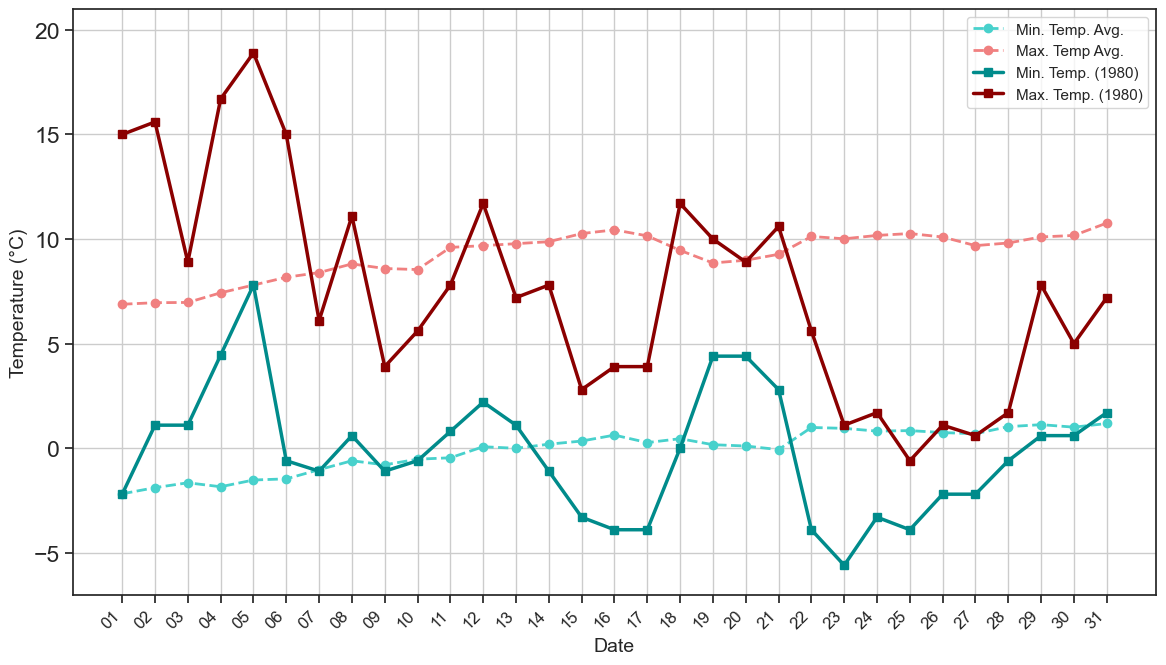

In [24]:
# Define the date range for May
days = np.arange(1, 32)  # Days from 1 to 31
dates = [date.strftime('%d') for date in pd.date_range('1980-05-01', '1980-05-31')]

# Filter data for those dates across all years
df_all_years_may = df_PARADISE[(df_PARADISE.index.month == 5) & (df_PARADISE.index.day.isin(days))]

# Calculate the average minimum and maximum temperatures for each day across all years
avg_min_temp_all_years = df_all_years_may.groupby(df_all_years_may.index.day)['TMIN'].mean()
avg_max_temp_all_years = df_all_years_may.groupby(df_all_years_may.index.day)['TMAX'].mean()

# Extract the 1980 data for May
df_1980_may = df_PARADISE.loc['1980-05-01':'1980-05-31']
min_temp_1980 = df_1980_may['TMIN'].interpolate()  # Interpolate missing data
max_temp_1980 = df_1980_may['TMAX']

# Create subplots
fig, ax = plt.subplots(figsize=(12, 7))

# Set the y-axis limits to give better visibility
ax.set_ylim(-7, 21)

# Plot the average min and max temperatures for all years
ax.plot(days, avg_min_temp_all_years.values, color='mediumturquoise', label='Min. Temp. Avg.', linewidth=2, linestyle='--', marker='o')
ax.plot(days, avg_max_temp_all_years.values, color='lightcoral', label='Max. Temp Avg.', linewidth=2, linestyle='--', marker='o')

# Plot the 1980 min and max temperatures
ax.plot(days, min_temp_1980.values, color='darkcyan', label='Min. Temp. (1980)', linewidth=2.5, linestyle='-', marker='s')
ax.plot(days, max_temp_1980.values, color='darkred', label='Max. Temp. (1980)', linewidth=2.5, linestyle='-', marker='s')

# Set labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Temperature (°C)", fontsize=14)

# Customize the x-axis with formatted dates
ax.set_xticks(days)
ax.set_xticklabels(dates, rotation=45, ha='right', fontsize=12)

# Add legend and grid
ax.legend(loc='upper right', fontsize=11)
ax.grid(True)

# Save and show the plot
plt.savefig("May_TEMP_Comparison.png")
plt.tight_layout()
plt.show()


# **3.	Evapotranspiration (ET)**

In [25]:
# Uncomment the next 5 lines to download data

# Define the directory for NOAA data
noaa_dir = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01').dir()

# Download the 'HEADERS.txt' file
noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01').download('HEADERS.txt')

# Download the data file for the year 2019
noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2019').download('CRNS0101-05-2019-WA_Quinault_4_NE.txt')

# Download the data file for the year 2020
noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2020').download('CRNS0101-05-2020-WA_Quinault_4_NE.txt')

# Download the data file for the year 2021
noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2021').download('CRNS0101-05-2021-WA_Quinault_4_NE.txt')

# Download the data file for the year 2022
noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2022').download('CRNS0101-05-2022-WA_Quinault_4_NE.txt')

# Download the data file for the year 2023
noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2023').download('CRNS0101-05-2023-WA_Quinault_4_NE.txt')


drwxrwsr-x   2 ftp      ftp          8192 Oct  7  2020 2006
drwxrwsr-x   2 ftp      ftp          8192 Nov 10  2021 2007
drwxrwsr-x   2 ftp      ftp          8192 Dec  1  2020 2008
drwxrwsr-x   2 ftp      ftp         12288 May 25  2021 2009
drwxrwsr-x   2 ftp      ftp         12288 Nov 10  2021 2010
drwxrwsr-x   2 ftp      ftp         12288 Nov 12  2021 2011
drwxrwsr-x   2 ftp      ftp         12288 Nov 12  2021 2012
drwxrwsr-x   2 ftp      ftp         12288 Nov 15  2021 2013
drwxrwsr-x   2 ftp      ftp         12288 Nov 15  2021 2014
drwxrwsr-x   2 ftp      ftp         12288 Nov 12  2021 2015
drwxrwsr-x   2 ftp      ftp         12288 Nov 12  2021 2016
drwxrwsr-x   2 ftp      ftp         12288 Nov 15  2021 2017
drwxrwsr-x   2 ftp      ftp         12288 Nov 12  2021 2018
drwxrwsr-x   2 ftp      ftp         12288 Nov 24  2021 2019
drwxrwsr-x   2 ftp      ftp         12288 Nov 30  2021 2020
drwxrwsr-x   2 ftp      ftp         12288 Jan 29  2022 2021
drwxrwsr-x   2 ftp      ftp         1228

Downloading:   0% [                                  ] ETA:  --:--:--   0.0 s/B
Downloading: 100% [##################################] ETA:  00:00:00 717.2 B/s
Downloading:   0% [                                  ] ETA:  --:--:--   0.0 s/B
Downloading:   0% [                                ] ETA:   0:19:11  12.0 KiB/s
Downloading:   0% [                                ] ETA:   0:11:05  20.8 KiB/s
Downloading:   0% [                                ] ETA:   0:04:56  46.5 KiB/s
Downloading:   0% [                                ] ETA:   0:02:35  88.7 KiB/s
Downloading:   1% [                                ] ETA:   0:01:23 163.8 KiB/s
Downloading:   3% [#                               ] ETA:   0:00:45 295.6 KiB/s
Downloading:   6% [##                              ] ETA:   0:00:24 540.6 KiB/s
Downloading:  10% [###                             ] ETA:   0:00:16 778.3 KiB/s
Downloading:  17% [#####                           ] ETA:   0:00:09   1.2 MiB/s
Downloading:  27% [########             

In [26]:
# Read column names from HEADERS file
column_names = pd.read_csv('HEADERS.txt', header=None, sep='\s+')

# Initialize an empty list to store dataframes
dfs = []

# List of years that is relevant 
years = ['2019', '2020', '2021', '2022', '2023'] 

# Loop through each year
for year in years:
    # Modify filename to read the corresponding year's data
    filename = f"CRNS0101-05-{year}-WA_Quinault_4_NE.txt"
    
    # Read CSV file using column names from another file
    df = pd.read_csv(filename,
                     sep='\s+',  # use (any number of) white spaces as delimiter between columns
                     names=column_names.iloc[1],  # column names from row i=1 of "column_names"
                     na_values=[-99, -9999, -99999],  # substitute these values by NaN
                     )
    
    # make integer column LST_DATE as string
    df['LST_DATE'] = df['LST_DATE'].astype(str)
    
    # pad numbers with 0 from the left, such that 15 becomes 0015
    df['LST_TIME'] = df['LST_TIME'].apply(lambda x: f'{x:0>4}')
    
    # combine both DATE and TIME 
    df['datetime'] = pd.to_datetime(df['LST_DATE'] + df['LST_TIME'], format='%Y%m%d%H%M')
    
    # Set datetime column as index
    df = df.set_index('datetime')
    
    # Remove any duplicate rows
    df = df[~df.index.duplicated(keep='first')]
    
    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all dataframes together
combined_df = pd.concat(dfs)

# Ensure the combined dataframe time
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-12-31')
combined_df = combined_df[start_date:end_date]

# Resample and calculate daily means for selected columns
df_PET = combined_df[['AIR_TEMPERATURE', 'RELATIVE_HUMIDITY', 'WIND_1_5']].resample('D').mean()
solar_radiation_sum = combined_df['SOLAR_RADIATION'].resample('D').sum()
df_PET['SOLAR_RADIATION'] = solar_radiation_sum * 5 * 60 * 1e-6  # Conversion to MJ/m²/day
elevation = 2.624

# Calculate potential evapotranspiration using the Penman method
penm2 = pyet.combination.penman(tmean=df_PET["AIR_TEMPERATURE"],
                                wind=df_PET["WIND_1_5"],
                                elevation=elevation,
                                rh=df_PET["RELATIVE_HUMIDITY"],
                                rn=df_PET["SOLAR_RADIATION"],
                                )

### *Figure 14: Seasonal Trends in Potential Evapotranspiration and Climatic Variables at Quinault, WA (2019-2024)*

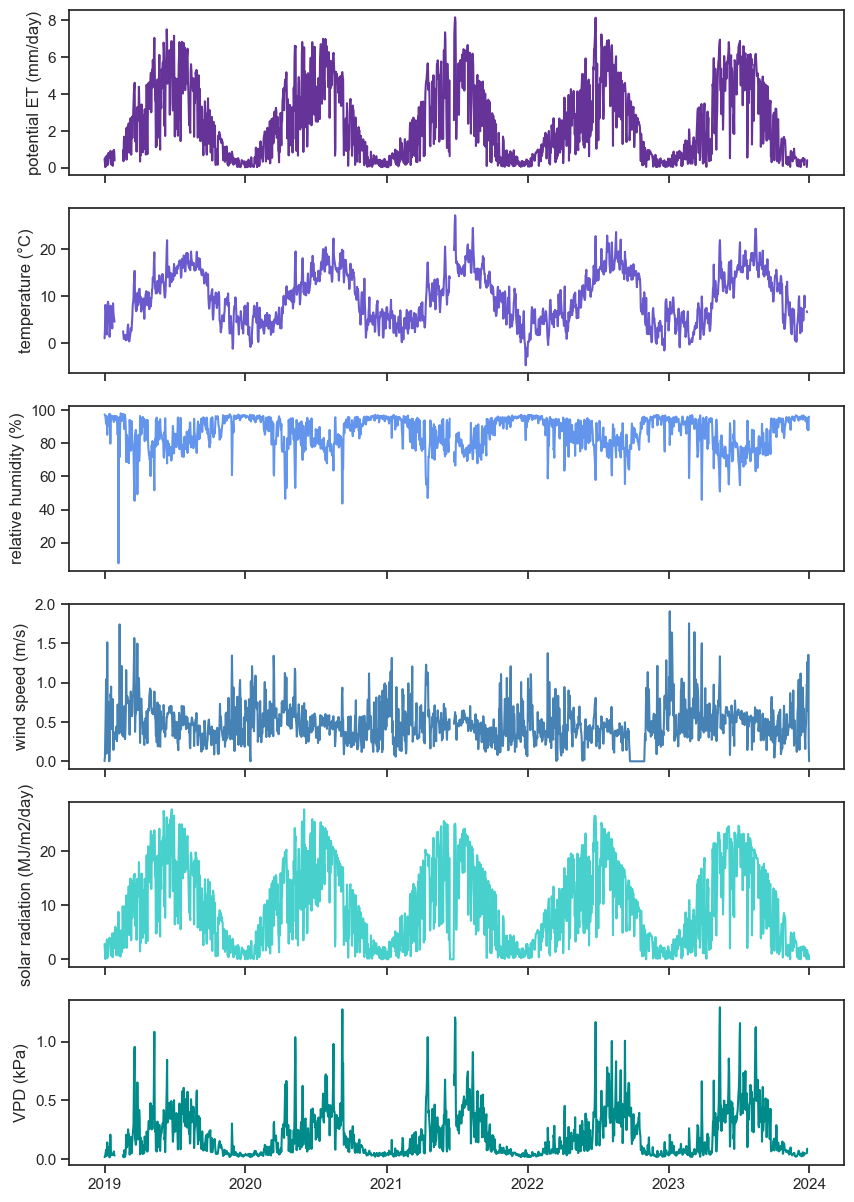

In [27]:
# Calculate saturated vapor pressure
es = pyet.meteo_utils.calc_es(tmean=df_PET["AIR_TEMPERATURE"])

# Calculate actual vapor pressure
ea = pyet.meteo_utils.calc_ea(tmean=df_PET["AIR_TEMPERATURE"],
                              rh=df_PET["RELATIVE_HUMIDITY"])

# Calculate vapor pressure deficit
vpd = es - ea

# Set seaborn theme and font scale
sns.set_theme(style="ticks", font_scale=1.0)

# Create subplots
fig, ax = plt.subplots(6,1, figsize=(10,15), sharex=True)

# Plot potential ET
ax[0].plot(penm2, color='rebeccapurple')
ax[0].set_ylabel("potential ET (mm/day)")

# Plot temperature
ax[1].plot(df_PET['AIR_TEMPERATURE'], color='slateblue')
ax[1].set_ylabel("temperature (°C)")

# Plot relative humidity
ax[2].plot(df_PET['RELATIVE_HUMIDITY'], color='cornflowerblue')
ax[2].set_ylabel("relative humidity (%)")

# Plot wind speed
ax[3].plot(df_PET['WIND_1_5'], color='steelblue')
ax[3].set_ylabel("wind speed (m/s)")

# Plot solar radiation
ax[4].plot(df_PET['SOLAR_RADIATION'], color='mediumturquoise')
ax[4].set_ylabel("solar radiation (MJ/m2/day)")

# Plot vapor pressure deficit
ax[5].plot(vpd, color='darkcyan')
ax[5].set_ylabel("VPD (kPa)")

# save the figure
plt.savefig("Meteorological_Variables_Mount_St_Helens.png")

# Show the plot
plt.show()